In [2]:
## Importing packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import *
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv("/Users/angshumanchakraborty/Desktop/Telco/Telecom_customer churn.csv")

In [4]:
df.columns

Index(['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean',
       'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou',
       'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean',
       'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean',
       'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean',
       'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean',
       'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean',
       'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean',
       'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean',
       'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean',
       'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean',
       'complete_Mean', 'callfwdv_Mean', 'callwait_Mean', 'churn', 'months',
       'uniqsubs', 'actvsubs', 'new_cell', 'crclscod', 'asl_flag', 'totcalls',
       'totmou', 'totrev', 'adjrev'

In [5]:
df.head(5)

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,0.0,I,U,U,U,U,U,Y,434.0,1000005


In [6]:
print(df.shape) # row x columns of data
print(df.ndim) # dimension of data
print(df.size) # size of data

(100000, 100)
2
10000000


In [7]:
df.describe() # Only numerical columns

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,models,truck,rv,lor,adults,income,numbcars,forgntvl,eqpdays,Customer_ID
count,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99109.000000,...,99999.000000,98268.000000,98268.000000,69810.000000,76981.000000,74564.000000,50634.000000,98268.000000,99999.000000,1.000000e+05
mean,58.719985,513.559937,46.179136,0.888828,41.072247,13.559560,13.295062,0.261318,1.286405,-13.933818,...,1.545825,0.188820,0.082580,6.177238,2.530326,5.783112,1.567563,0.057974,391.932309,1.050000e+06
std,46.291677,525.168140,23.623489,2.177619,97.296150,30.500885,30.056089,3.126531,14.711374,276.087509,...,0.898395,0.391368,0.275248,4.735267,1.452819,2.182132,0.625456,0.233696,256.482193,2.886766e+04
min,-6.167500,0.000000,-26.915000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3875.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-5.000000,1.000001e+06
25%,33.260000,150.750000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-87.000000,...,1.000000,0.000000,0.000000,2.000000,1.000000,4.000000,1.000000,0.000000,212.000000,1.025001e+06
50%,48.195000,355.500000,44.990000,0.247500,2.750000,1.000000,0.682500,0.000000,0.000000,-6.250000,...,1.000000,0.000000,0.000000,5.000000,2.000000,6.000000,1.000000,0.000000,342.000000,1.050000e+06
75%,70.750000,703.000000,59.990000,0.990000,42.000000,14.437500,14.025000,0.000000,0.235000,63.000000,...,2.000000,0.000000,0.000000,9.000000,3.000000,7.000000,2.000000,0.000000,530.000000,1.075000e+06
max,3843.262500,12206.750000,409.990000,159.390000,4320.750000,1102.400000,896.087500,423.540000,3685.200000,31219.250000,...,16.000000,1.000000,1.000000,15.000000,6.000000,9.000000,3.000000,1.000000,1823.000000,1.100000e+06


In [8]:
df.describe(include=['O']) # Only object columns

,new_cell,crclscod,asl_flag,prizm_social_one,area,dualband,refurb_new,hnd_webcap,ownrent,dwlltype,...,infobase,HHstatin,dwllsize,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd
count,100000,100000,100000,92612,99960,99999,99999,89811,66294,68091,...,77921,62077,61692,98268,98268,98268,98268,98268,98268,98268
unique,3,54,2,5,19,4,2,3,2,2,...,2,6,15,17,2,2,2,2,2,2
top,U,AA,N,S,NEW YORK CITY AREA,Y,N,WCMB,O,S,...,M,C,A,N,U,U,U,U,U,Y
freq,66914,36509,86064,32097,11098,72265,85593,75733,64284,48759,...,77697,39124,47205,33389,94256,93572,90195,89454,88304,67234


In [9]:
df.info() ##seems like few features have lot of null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 100 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          99643 non-null   float64
 1   mou_Mean          99643 non-null   float64
 2   totmrc_Mean       99643 non-null   float64
 3   da_Mean           99643 non-null   float64
 4   ovrmou_Mean       99643 non-null   float64
 5   ovrrev_Mean       99643 non-null   float64
 6   vceovr_Mean       99643 non-null   float64
 7   datovr_Mean       99643 non-null   float64
 8   roam_Mean         99643 non-null   float64
 9   change_mou        99109 non-null   float64
 10  change_rev        99109 non-null   float64
 11  drop_vce_Mean     100000 non-null  float64
 12  drop_dat_Mean     100000 non-null  float64
 13  blck_vce_Mean     100000 non-null  float64
 14  blck_dat_Mean     100000 non-null  float64
 15  unan_vce_Mean     100000 non-null  float64
 16  unan_dat_Mean     10

In [10]:
df.drop(["Customer_ID"], axis = 1, inplace=True)  ## unique value for each customer and has no info

In [11]:
def columns_categories(data_set):
    object_columns = []
    float_columns = []
    int_columns = []
    other_columns = []
    n,m,s=0,0,0
    for i in data_set.columns.values:
        if data_set[i].dtypes=='object':
            object_columns.append(i)
            n+=1
        if data_set[i].dtypes=='int':
            int_columns.append(i)
            m+=1
        if data_set[i].dtypes=='float':
            float_columns.append(i)
            s+=1
    print('object(',n,'):\n',object_columns)
    print('int(',m,'):\n',int_columns)
    print('float(',s,'):\n',float_columns)

In [12]:
columns_categories(df)

object( 21 ):
 ['new_cell', 'crclscod', 'asl_flag', 'prizm_social_one', 'area', 'dualband', 'refurb_new', 'hnd_webcap', 'ownrent', 'dwlltype', 'marital', 'infobase', 'HHstatin', 'dwllsize', 'ethnic', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd']
int( 9 ):
 ['churn', 'months', 'uniqsubs', 'actvsubs', 'totcalls', 'adjqty', 'avg3mou', 'avg3qty', 'avg3rev']
float( 69 ):
 ['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean', 'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou', 'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean', 'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean', 'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean', 'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean', 'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean', 'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean', 'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean', 'mou_peav

In [13]:
obj_col = df.select_dtypes(include = 'object').columns
obj_col

Index(['new_cell', 'crclscod', 'asl_flag', 'prizm_social_one', 'area',
       'dualband', 'refurb_new', 'hnd_webcap', 'ownrent', 'dwlltype',
       'marital', 'infobase', 'HHstatin', 'dwllsize', 'ethnic', 'kid0_2',
       'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd'],
      dtype='object')

In [14]:
obj_col = obj_col.to_list()

## Churn relation with categorical columns

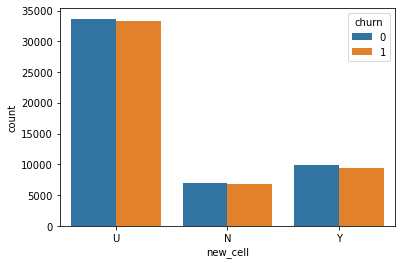

In [15]:

## new_cell vs churn
sns.countplot(x= "new_cell", hue="churn", data=df);
plt.xticks()
plt.show()


In [16]:
df.groupby('new_cell')["churn"].value_counts(normalize=True).unstack(fill_value=0)

churn,0,1
new_cell,,
N,0.503373,0.496627
U,0.503049,0.496951
Y,0.509715,0.490285


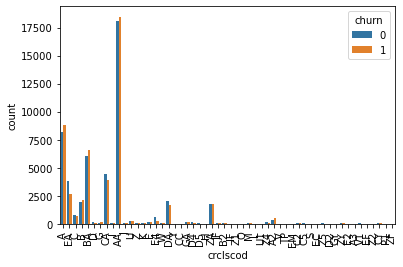

In [17]:
# crclscod vs churn
sns.countplot(x= "crclscod", hue="churn", data=df);
plt.xticks(rotation = 90)
plt.show()

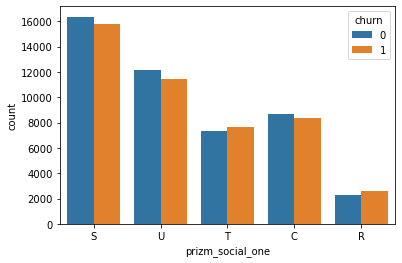

churn,0,1
prizm_social_one,,
C,0.509226,0.490774
R,0.472932,0.527068
S,0.509238,0.490762
T,0.491627,0.508373
U,0.515182,0.484818


In [18]:
# prizm_social_one vs churn
sns.countplot(x= "prizm_social_one", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('prizm_social_one')["churn"].value_counts(normalize=True).unstack(fill_value=0)

In [19]:
## checking churn relation with all categorical columns

def count_plot(data):
    for item in obj_col:
            
        sns.countplot(x= item, hue="churn", data=data);
        plt.xticks()
        plt.show()
        print(df.groupby(item)["churn"].value_counts(normalize=True).unstack(fill_value=0))

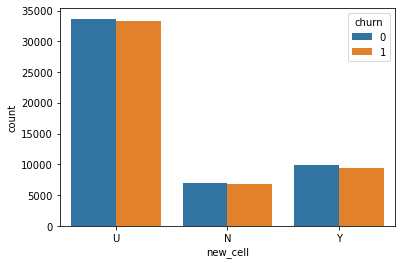

churn            0         1
new_cell                    
N         0.503373  0.496627
U         0.503049  0.496951
Y         0.509715  0.490285


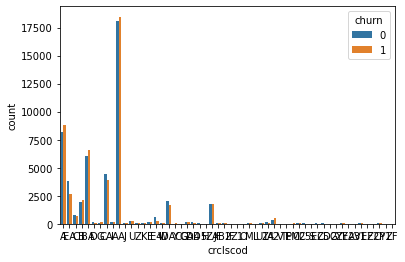

churn            0         1
crclscod                    
A         0.482702  0.517298
A2        0.384437  0.615563
A3        0.333333  0.666667
AA        0.494316  0.505684
B         0.475669  0.524331
B2        0.467890  0.532110
BA        0.478724  0.521276
C         0.520604  0.479396
C2        0.527778  0.472222
C5        0.703704  0.296296
CA        0.531317  0.468683
CC        0.520000  0.480000
CY        0.547368  0.452632
D         0.550607  0.449393
D2        0.600000  0.400000
D4        0.627907  0.372093
D5        0.807018  0.192982
DA        0.551104  0.448896
E         0.592920  0.407080
E2        0.857143  0.142857
E4        0.693878  0.306122
EA        0.590279  0.409721
EC        0.645833  0.354167
EF        0.500000  0.500000
EM        0.421053  0.578947
G         0.460581  0.539419
GA        0.501779  0.498221
GY        0.441176  0.558824
H         0.777778  0.222222
I         0.506173  0.493827
IF        0.500000  0.500000
J         0.531579  0.468421
JF        0.42

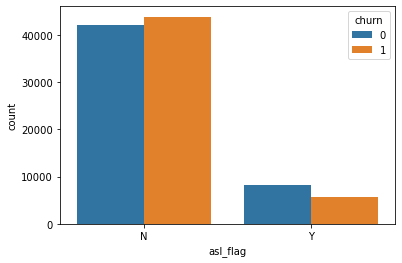

churn            0         1
asl_flag                    
N         0.490402  0.509598
Y         0.590700  0.409300


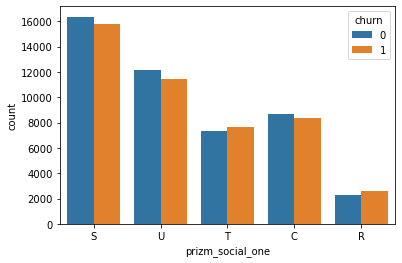

churn                    0         1
prizm_social_one                    
C                 0.509226  0.490774
R                 0.472932  0.527068
S                 0.509238  0.490762
T                 0.491627  0.508373
U                 0.515182  0.484818


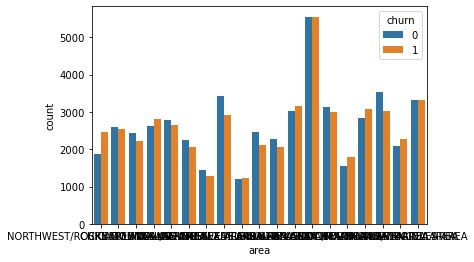

churn                                 0         1
area                                             
ATLANTIC SOUTH AREA            0.510274  0.489726
CALIFORNIA NORTH AREA          0.478945  0.521055
CENTRAL/SOUTH TEXAS AREA       0.521517  0.478483
CHICAGO AREA                   0.504766  0.495234
DALLAS AREA                    0.512532  0.487468
DC/MARYLAND/VIRGINIA AREA      0.539668  0.460332
GREAT LAKES AREA               0.523553  0.476447
HOUSTON AREA                   0.524994  0.475006
LOS ANGELES AREA               0.501808  0.498192
MIDWEST AREA                   0.540971  0.459029
NEW ENGLAND AREA               0.482575  0.517425
NEW YORK CITY AREA             0.499730  0.500270
NORTH FLORIDA AREA             0.480000  0.520000
NORTHWEST/ROCKY MOUNTAIN AREA  0.430915  0.569085
OHIO AREA                      0.536245  0.463755
PHILADELPHIA AREA              0.493459  0.506541
SOUTH FLORIDA AREA             0.466387  0.533613
SOUTHWEST AREA                 0.489898  0.510102


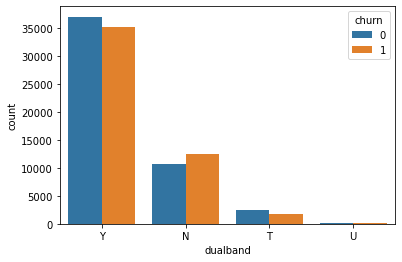

churn            0         1
dualband                    
N         0.463183  0.536817
T         0.578082  0.421918
U         0.653153  0.346847
Y         0.512738  0.487262


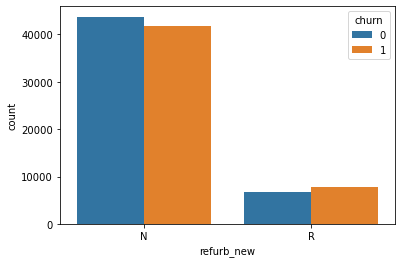

churn              0         1
refurb_new                    
N           0.510895  0.489105
R           0.465639  0.534361


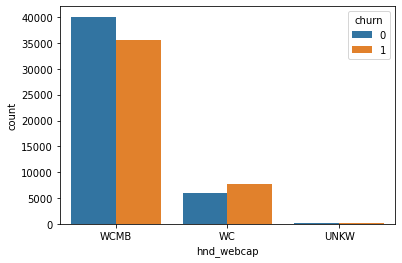

churn              0         1
hnd_webcap                    
UNKW        0.634043  0.365957
WC          0.436972  0.563028
WCMB        0.529201  0.470799


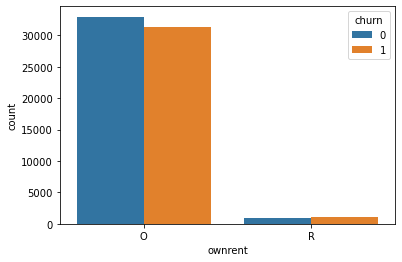

churn           0         1
ownrent                    
O        0.512803  0.487197
R        0.480597  0.519403


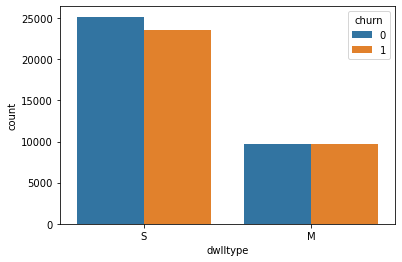

churn            0         1
dwlltype                    
M         0.501345  0.498655
S         0.516069  0.483931


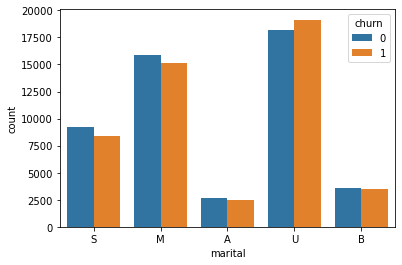

churn           0         1
marital                    
A        0.510311  0.489689
B        0.503092  0.496908
M        0.511336  0.488664
S        0.525330  0.474670
U        0.487344  0.512656


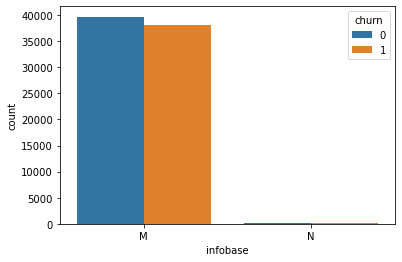

churn            0         1
infobase                    
M         0.510779  0.489221
N         0.669643  0.330357


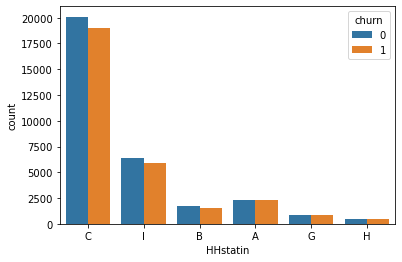

churn            0         1
HHstatin                    
A         0.500857  0.499143
B         0.520333  0.479667
C         0.513623  0.486377
G         0.497169  0.502831
H         0.477790  0.522210
I         0.519025  0.480975


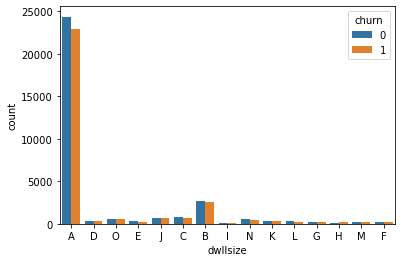

churn            0         1
dwllsize                    
A         0.515772  0.484228
B         0.504323  0.495677
C         0.524382  0.475618
D         0.491299  0.508701
E         0.539595  0.460405
F         0.507317  0.492683
G         0.515068  0.484932
H         0.480132  0.519868
I         0.466418  0.533582
J         0.485315  0.514685
K         0.497731  0.502269
L         0.541016  0.458984
M         0.485333  0.514667
N         0.513000  0.487000
O         0.513652  0.486348


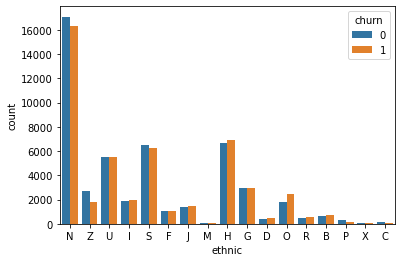

churn          0         1
ethnic                    
B       0.446870  0.553130
C       0.684426  0.315574
D       0.466513  0.533487
F       0.496474  0.503526
G       0.504227  0.495773
H       0.491669  0.508331
I       0.487798  0.512202
J       0.483791  0.516209
M       0.463087  0.536913
N       0.511516  0.488484
O       0.419247  0.580753
P       0.625514  0.374486
R       0.468451  0.531549
S       0.508669  0.491331
U       0.499772  0.500228
X       0.674419  0.325581
Z       0.602938  0.397062


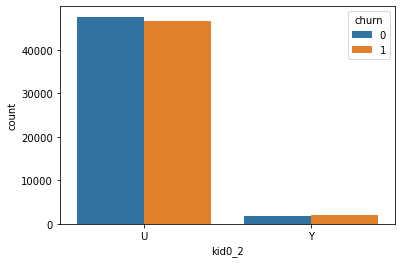

churn          0         1
kid0_2                    
U       0.505082  0.494918
Y       0.480558  0.519442


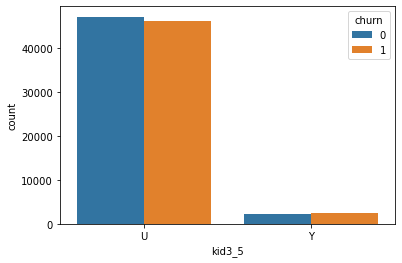

churn          0         1
kid3_5                    
U       0.504606  0.495394
Y       0.493612  0.506388


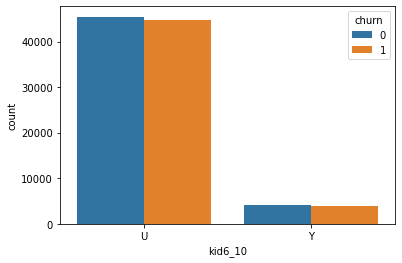

churn           0         1
kid6_10                    
U        0.503764  0.496236
Y        0.507618  0.492382


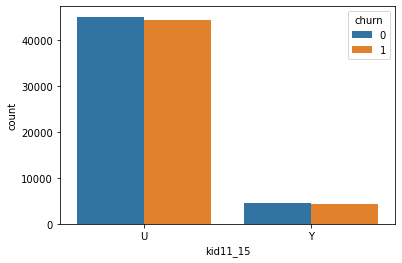

churn            0         1
kid11_15                    
U         0.503533  0.496467
Y         0.509644  0.490356


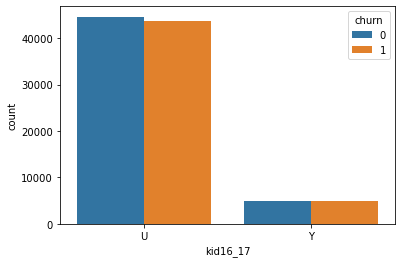

churn            0         1
kid16_17                    
U         0.504790  0.495210
Y         0.497792  0.502208


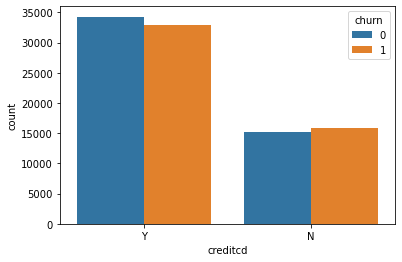

churn            0         1
creditcd                    
N         0.491719  0.508281
Y         0.509787  0.490213


In [20]:
count_plot(df)

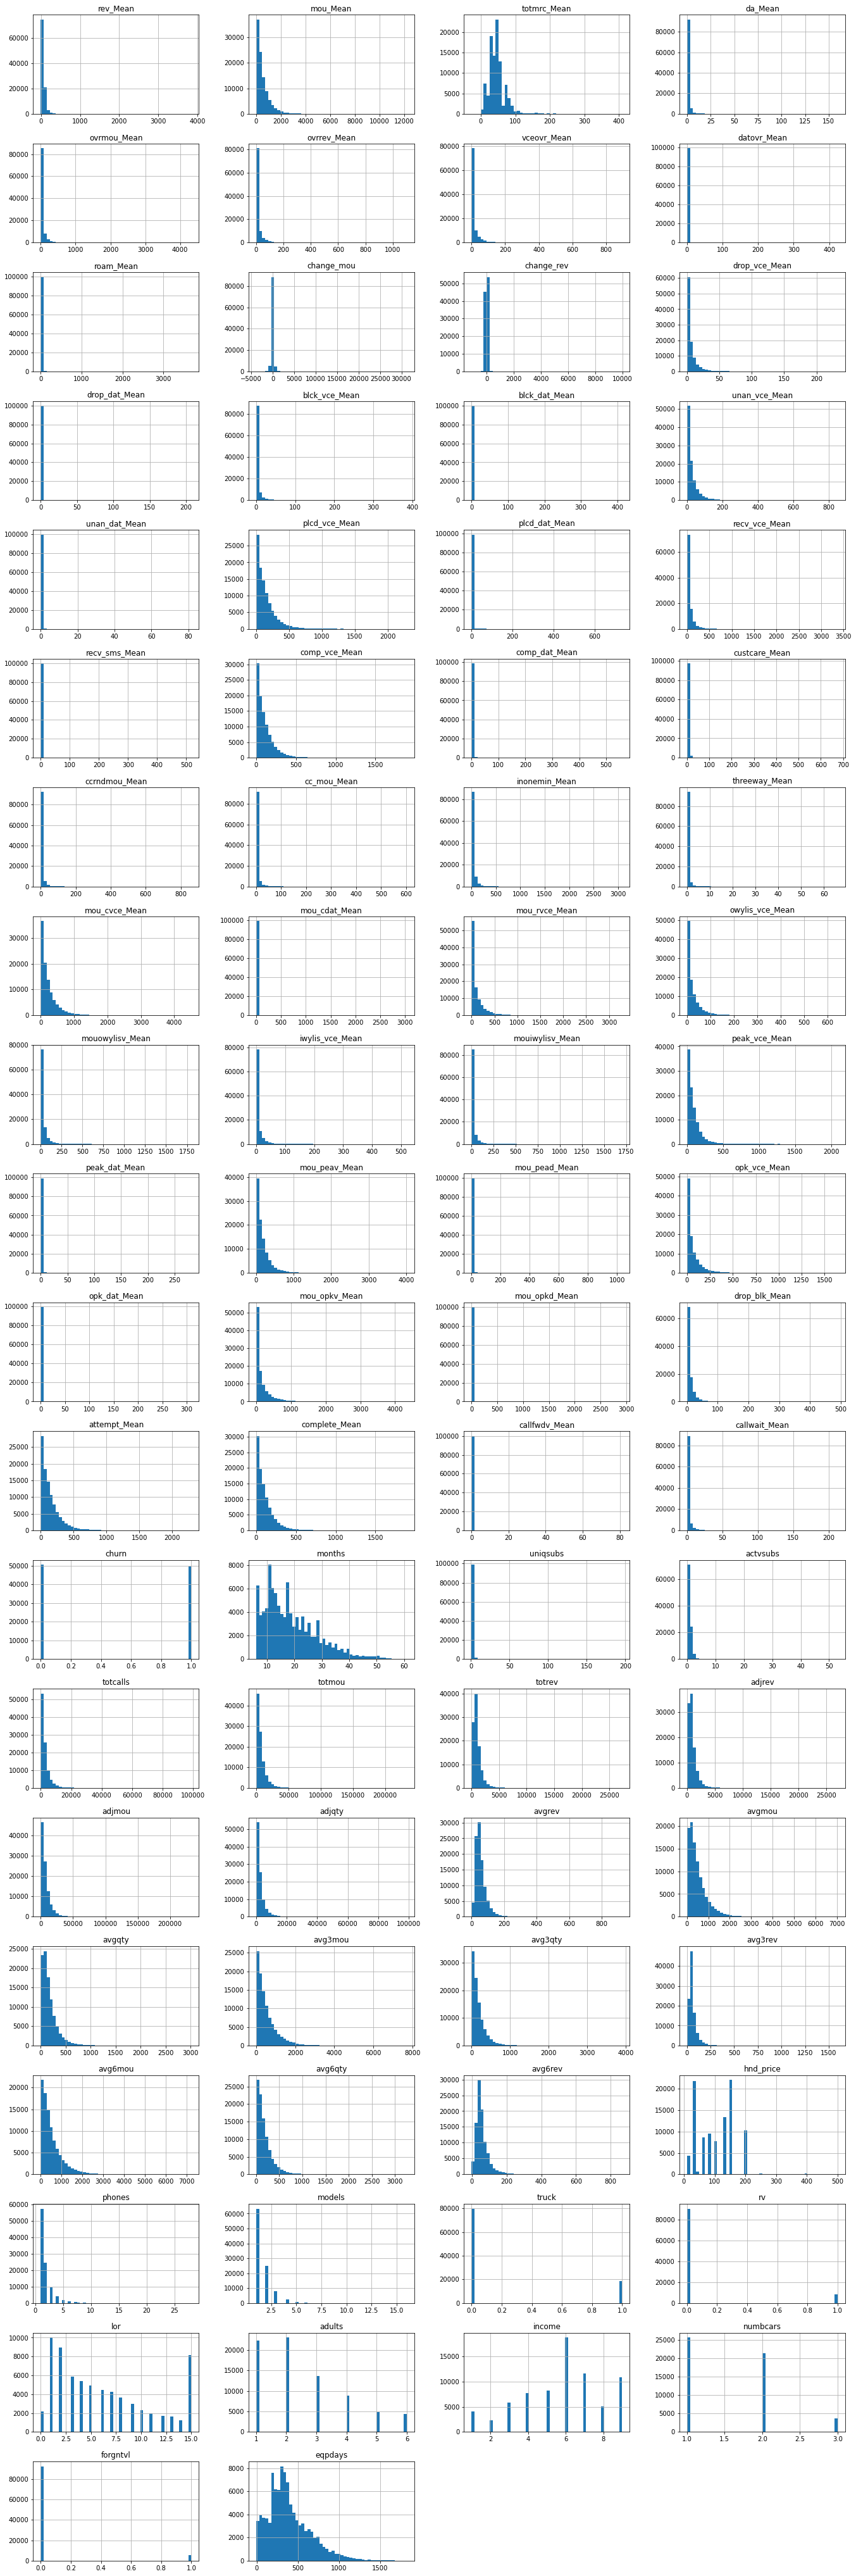

In [21]:
## distribution for numerical variables
df.iloc[:,:].hist(bins=50,figsize=(23,74),layout=(20,4));

In [22]:
no_churn = df[(df['churn'] ==0) ].count()[1]
churn = df[(df['churn'] ==1) ].count()[1]
print ("num of people who did not churn: "+ str(no_churn))
print ("num of people who churn: "+ str(churn))

num of people who did not churn: 50326
num of people who churn: 49317


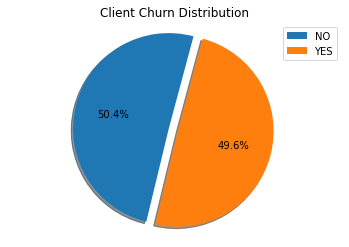

In [23]:
# ratio of those who churn and those who don't
labels='NO','YES'
explode = (0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie([48401,47647], explode=explode,autopct='%1.1f%%',shadow=True, startangle=75 )
ax1.axis('equal') 
ax1.set_title("Client Churn Distribution")

ax1.legend(labels)

plt.show()

In [24]:
## Handling missing values

In [25]:
df.columns[df.isnull().any()]

Index(['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean',
       'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou',
       'change_rev', 'avg6mou', 'avg6qty', 'avg6rev', 'prizm_social_one',
       'area', 'dualband', 'refurb_new', 'hnd_price', 'phones', 'models',
       'hnd_webcap', 'truck', 'rv', 'ownrent', 'lor', 'dwlltype', 'marital',
       'adults', 'infobase', 'income', 'numbcars', 'HHstatin', 'dwllsize',
       'forgntvl', 'ethnic', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15',
       'kid16_17', 'creditcd', 'eqpdays'],
      dtype='object')

In [26]:
print('# of missing value columns:' + str(len(df.columns[df.isnull().any()])))

# of missing value columns:43


In [27]:
# Features with missing values
miss = df.isnull().sum().sort_values(ascending = False).head(44)
miss_per = (miss/len(df))*100

# Percentage of missing values
pd.DataFrame({'No. missing values': miss, '% of missing data': miss_per.values})

,No. missing values,% of missing data
numbcars,49366,49.366
dwllsize,38308,38.308
HHstatin,37923,37.923
ownrent,33706,33.706
dwlltype,31909,31.909
lor,30190,30.190
income,25436,25.436
adults,23019,23.019
infobase,22079,22.079
hnd_webcap,10189,10.189


In [28]:
df['hnd_webcap']

0        WCMB
1          WC
2         NaN
3         NaN
4        WCMB
         ... 
99995      WC
99996      WC
99997    WCMB
99998    WCMB
99999    WCMB
Name: hnd_webcap, Length: 100000, dtype: object

## Handling Missing values

In [29]:
df["infobase"].value_counts()

M    77697
N      224
Name: infobase, dtype: int64

In [30]:
df["infobase"].isna().sum()

22079

In [31]:
## Features with more than 5% of missing values can be dropped since missing value imputation for such features 
## could introduce noise to the model
## features which are dropped:
## 1. numbcars: Known number of vehicles
## 2. dwllsize: Dwelling size
## 3. HHstatin: Premier household status indicator
## 4. ownrent: Home owner/renter status
## 5. dwlltype: Dwelling Unit type
## 6. lor: Length of residence
## 7. income: Estimated income
## 8. adults: Number of adults in household
## 9. prizm_social_one: Social group letter only

## The Infobase feature is not dropped and imputed using mode since more than 99% of values are 'M'

In [32]:
df.drop(['numbcars','dwllsize','HHstatin','ownrent',
         'dwlltype','lor','income','adults','prizm_social_one','crclscod'],axis=1,inplace=True)

In [33]:
df["infobase"].fillna(df["infobase"].mode()[0], inplace=True)

In [34]:
df['hnd_webcap']=df['hnd_webcap'].fillna('UNKW') # Handset web capability

df['avg6qty']=df['avg6qty'].fillna(df['avg6qty'].mean()) # Billing adjusted total number of calls over the life of the customer
df['avg6rev']=df['avg6rev'].fillna(df['avg6rev'].mean()) # Average monthly revenue over the life of the customer
df['avg6mou']=df['avg6mou'].fillna(df['avg6mou'].mean()) # Average monthly minutes of use over the life of the customer

df['change_mou']=df['change_mou'].fillna(df['change_mou'].mean()) # Percentage change in monthly minutes of use vs previous three month average
df['change_rev']=df['change_rev'].fillna(df['change_rev'].mean()) # Percentage change in monthly revenue vs previous three month average

df['rev_Mean']=df['rev_Mean'].fillna(df['rev_Mean'].mean())
df['totmrc_Mean']=df['totmrc_Mean'].fillna(df['totmrc_Mean'].mean())
df['da_Mean']=df['da_Mean'].fillna(df['da_Mean'].mean())
df['ovrmou_Mean']=df['ovrmou_Mean'].fillna(df['ovrmou_Mean'].mean())
df['ovrrev_Mean']=df['ovrrev_Mean'].fillna(df['ovrrev_Mean'].mean())
df['vceovr_Mean']=df['vceovr_Mean'].fillna(df['vceovr_Mean'].mean())
df['datovr_Mean']=df['datovr_Mean'].fillna(df['datovr_Mean'].mean())
df['roam_Mean']=df['roam_Mean'].fillna(df['roam_Mean'].mean())
df['mou_Mean']=df['mou_Mean'].fillna(df['mou_Mean'].mean())




In [35]:
## Filling Unknow where missing values are there
df['kid16_17']=df['kid16_17'].fillna('U')
df['kid11_15']=df['kid11_15'].fillna('U')
df['kid6_10']=df['kid6_10'].fillna('U')
df['kid3_5']=df['kid3_5'].fillna('U')
df['kid0_2']=df['kid0_2'].fillna('U')

In [36]:
df["marital"] = df['marital'].fillna('U')

In [37]:
df['hnd_price']=df['hnd_price'].fillna(df['hnd_price'].mean())

In [38]:
# Remaining Features with missing values
miss = df.isnull().sum().sort_values(ascending = False).head(44)
miss_per = (miss/len(df))*100

# Percentage of missing values
pd.DataFrame({'No. missing values': miss, '% of missing data': miss_per.values})

,No. missing values,% of missing data
truck,1732,1.732
rv,1732,1.732
creditcd,1732,1.732
ethnic,1732,1.732
forgntvl,1732,1.732
area,40,0.040
dualband,1,0.001
refurb_new,1,0.001
phones,1,0.001
models,1,0.001


In [39]:
## Now dropping all null values after missing value imputation
df.dropna(inplace=True)

In [40]:
df.shape

(98227, 89)

## Visualization and outlier detection: ## This section can be excluded: Capping outliers is not necessary

In [143]:
## TBD later

In [133]:
columns_categories(df)

object( 16 ):
 ['new_cell', 'crclscod', 'asl_flag', 'area', 'dualband', 'refurb_new', 'hnd_webcap', 'marital', 'infobase', 'ethnic', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd']
int( 9 ):
 ['churn', 'months', 'uniqsubs', 'actvsubs', 'totcalls', 'adjqty', 'avg3mou', 'avg3qty', 'avg3rev']
float( 65 ):
 ['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean', 'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou', 'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean', 'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean', 'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean', 'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean', 'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean', 'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean', 'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean', 'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean', 'mou_opkv_

In [136]:
x = ['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean', 'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou', 'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean', 'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean', 'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean', 'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean', 'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean', 'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean', 'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean', 'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean', 'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean', 'complete_Mean', 'callfwdv_Mean', 'callwait_Mean', 'totmou', 'totrev', 'adjrev', 'adjmou', 'avgrev', 'avgmou', 'avgqty', 'avg6mou', 'avg6qty', 'avg6rev', 'hnd_price', 'phones', 'models', 'truck', 'rv', 'forgntvl', 'eqpdays']

In [1]:
len(x)

NameError: name 'x' is not defined

In [138]:
y = ['months', 'uniqsubs', 'actvsubs', 'totcalls', 'adjqty', 'avg3mou', 'avg3qty', 'avg3rev']

In [139]:
numerical_feat = x+y

IndexError: index 60 is out of bounds for axis 0 with size 60

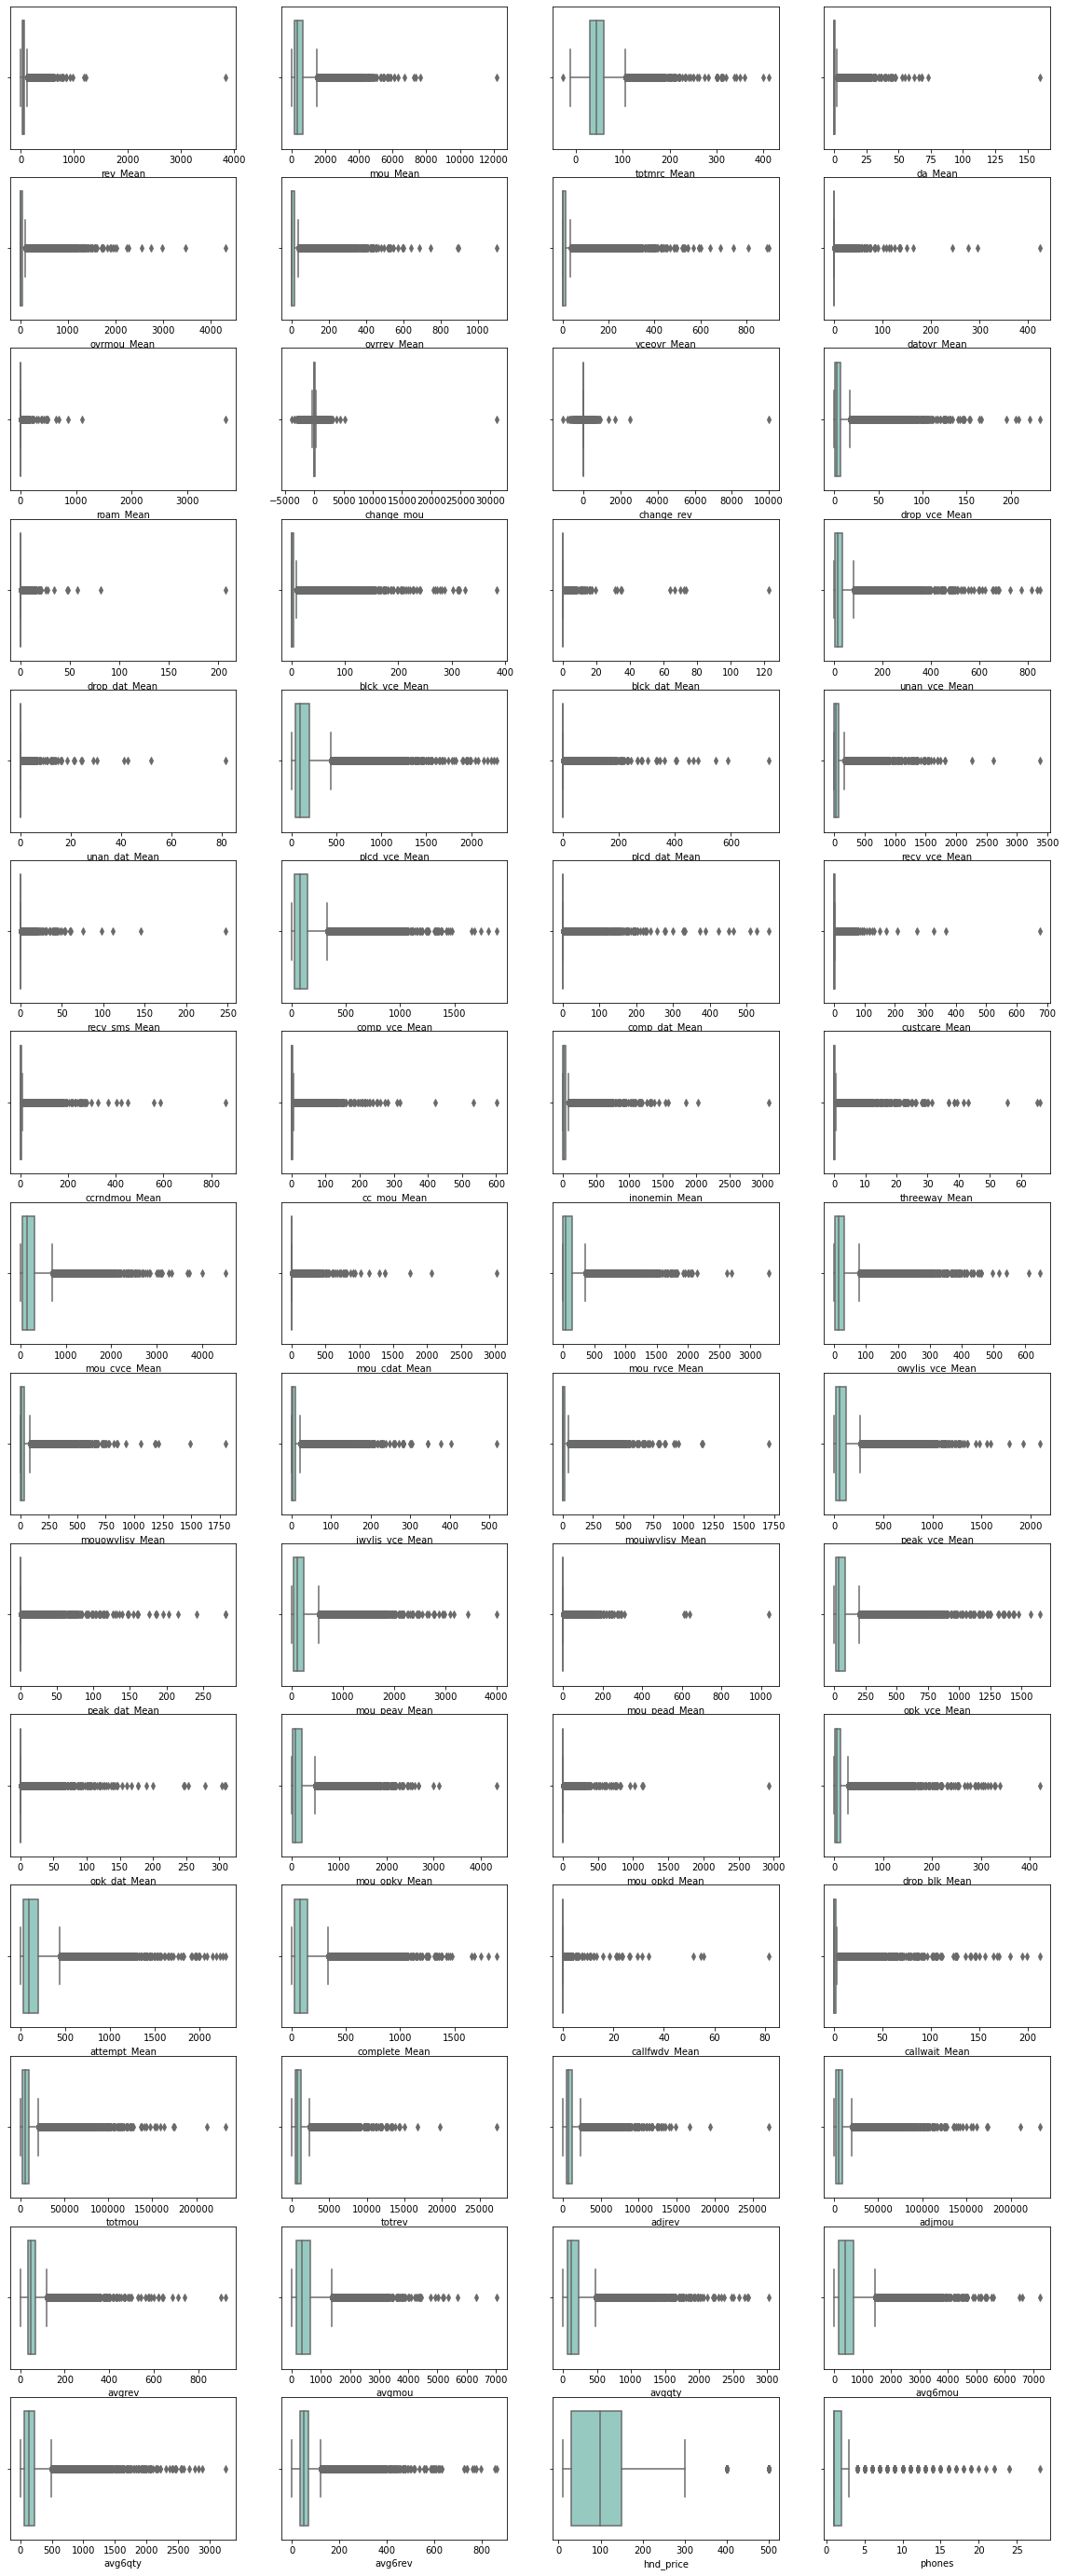

In [142]:
# Box plot of numerical features
fig, ax = plt.subplots(15, 4, figsize = (20, 50))
ax = ax.flatten()
for i, c in enumerate(numerical_feat):
    sns.boxplot(x = df[c], ax = ax[i], palette = 'Set3')
# plt.suptitle('Box Plot', fontsize = 25)
fig.tight_layout()

## Feature engineering

In [41]:
## Total number of kids of a customer
kid_cols = ['kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17']
df['total_kid']=df[kid_cols].replace({'Y':1,'U':0}).apply(sum, axis=1)

In [42]:
## Average number of blocked (failed) voice calls / Average number of voice call attempts made 
df['vce_blk_rate'] = (df['blck_vce_Mean'] / df['plcd_vce_Mean']).fillna(0)

In [43]:
## Average number of dropped (failed) voice calls / Average number of voice call attempts made
df['vce_drp_rate'] = (df['drop_vce_Mean'] / df['plcd_vce_Mean']).fillna(0)

In [44]:
## Average number of blocked (failed) data calls / Average number of data call attempts made
df['dat_blk_rate'] = (df['blck_dat_Mean'] / df['plcd_dat_Mean']).fillna(0)

In [45]:
## Average number of completed voice calls / Average number of voice call attempts made 
df['vce_cmpt_rate'] = (df['comp_vce_Mean'] / df['plcd_vce_Mean']).fillna(0)

In [46]:
## Average number of completed data calls / Average number of data call attempts made
df['dat_cmpt_rate'] = (df['comp_dat_Mean'] / df['plcd_dat_Mean']).fillna(0)

In [47]:
## Average number of completed searches / Average number of attempted calls
df['tot_cmpt_rate'] = (df['complete_Mean'] / df['attempt_Mean']).fillna(0)

In [48]:
## Average number of dropped or blocked calls / Average number of attempted calls
df['tot_drp_blk_rate'] = (df['drop_blk_Mean'] / df['attempt_Mean']).fillna(0)

In [49]:
## Average number of voice call attempts made  / Average number of voice and data call attempts made
df['vce_dat_ratio'] = (df['plcd_vce_Mean'] /  (df['plcd_vce_Mean'] + df['plcd_dat_Mean'])).fillna(0)

In [50]:
## (Average monthly usage minutes in the previous three months - Average monthly usage minutes 
## over the customer's lifetime)  / Average monthly usage minutes over the customer's lifetime
df['diff_3mon_overall_mou'] = ((df['avg3mou'] - df['avgmou']) / df['avgmou']).fillna(0)

In [51]:
## (Average monthly searches over the previous three months - Average monthly calls over 
## the customer's lifetime)  / Average monthly calls over the customer's lifetime
df['diff_3mon_overall_qty'] = ((df['avg3qty'] - df['avgqty']) / df['avgqty']).fillna(0)

In [52]:
# # (Average monthly income over the previous three months - Average monthly income 
## over the customer's lifetime)  / Average monthly income over the customer's lifetime
df['diff_3mon_overall_rev'] = ((df['avg3rev'] - df['avgrev']) / df['avgrev']).fillna(0)

In [53]:
## (Average monthly usage minutes in the previous six months - Average monthly usage minutes 
## over the customer's lifetime)  / Average monthly usage minutes over the customer's lifetime
df['diff_6mon_overall_mou'] = ((df['avg6mou'] - df['avgmou']) / df['avgmou']).fillna(0)

In [54]:
# # (Average monthly searches over the previous six months - Average monthly calls over
## the customer's lifetime)  / Average monthly calls over the customer's lifetime
df['diff_6mon_overall_qty'] = ((df['avg6qty'] - df['avgqty']) / df['avgqty']).fillna(0)

In [55]:
# # (Average monthly income over the previous six months - Average monthly income over 
## the customer's lifetime)  / Average monthly income over the customer's lifetime
df['diff_6mon_overall_rev'] = ((df['avg6rev'] - df['avgrev']) / df['avgrev']).fillna(0)

In [56]:
df.shape

(98227, 104)

## feature scaling and one hot encoding

In [57]:
# Unique variables of object columns
encoding_col=[]
for i in df.select_dtypes(include='object'):   
    print(i,'-->',df[i].nunique())
    encoding_col.append(i)

new_cell --> 3
asl_flag --> 2
area --> 19
dualband --> 4
refurb_new --> 2
hnd_webcap --> 3
marital --> 5
infobase --> 2
ethnic --> 17
kid0_2 --> 2
kid3_5 --> 2
kid6_10 --> 2
kid11_15 --> 2
kid16_17 --> 2
creditcd --> 2


In [58]:
# one-hot encoding for variables with more than 2 categories
df2 = df.copy()
df2 = pd.get_dummies(df2, drop_first=True, columns = encoding_col, prefix = encoding_col)

In [59]:
display(df.shape)
display(df2.shape)

(98227, 104)

(98227, 143)

In [96]:
## Feature scaling done in Modeling part

## Variable selection and Correlational Analysis

In [180]:
## need to drop if high correlation? Evaluate this section based on model performance later

In [60]:
# Create correlation matrix
corr_matrix = df_new.corr().abs()
# print(corr_matrix)

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

df_new.drop(columns = to_drop)
df_new.shape

<ipython-input-60-750934e3e90c>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [61]:
to_drop

['ovrrev_Mean',
 'vceovr_Mean',
 'comp_vce_Mean',
 'comp_dat_Mean',
 'cc_mou_Mean',
 'inonemin_Mean',
 'mou_opkd_Mean',
 'attempt_Mean',
 'complete_Mean',
 'adjrev',
 'adjmou',
 'adjqty',
 'avg3mou',
 'avg6qty',
 'tot_cmpt_rate']

In [94]:
### Running the model after dropping highly correlated columns didn't work

## Modeling

In [62]:
## Dropping 11 rows where feature  has infinite value
df_new = df2[np.isfinite(df2).all(1)]
df_new.shape

(98216, 143)

In [63]:
#Import metric for performance evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix, ConfusionMatrixDisplay

#Split data into train and test sets
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold,GridSearchCV

In [84]:
# dependent and independent variables were determined.
X = df_new.drop('churn', axis=1)
y = df_new['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train:",len(X_train))
print("X_test:",len(X_test))
print("y_train:",len(y_train))
print("y_test:",len(y_test))

X_train: 78572
X_test: 19644
y_train: 78572
y_test: 19644


In [85]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [86]:
from sklearn.linear_model import LogisticRegression


In [87]:
# Initialising logistic Regression
lr = LogisticRegression(max_iter = 10000,random_state=42)
# Creating hyper parameter grid
parameter_grid = {'solver': ['liblinear'],
                  'penalty': ['l1', 'l2', 'none'],
                  'C': [10, 1.0, 0.1]}

gs = GridSearchCV(estimator=lr, 
                  param_grid=parameter_grid, n_jobs=-1, cv=3, scoring='roc_auc', error_score=0)

In [68]:
# Fitting the model
grid_result = gs.fit(X_train, y_train)

# Finding the best model
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.628955 using {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}


In [88]:
# Initialising hyper tuned logistic Regression
log_reg_ht = LogisticRegression(C= 1.0, penalty= 'l1', solver= 'liblinear', random_state = 42)

# Fitting the model
log_reg_ht.fit(X_train, y_train)

LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

In [89]:
# Predicting the labels
y_pred = log_reg_ht.predict(X_test)

In [90]:
#Performance evaluation
def print_scores(y_true, y_pred):
    acc_score = accuracy_score(y_true, y_pred)
    print("accuracy: ",acc_score)
    pre_score = precision_score(y_true, y_pred)
    print("precision: ",pre_score)
    rec_score = recall_score(y_true, y_pred)                            
    print("recall: ",rec_score)
    f_score = f1_score(y_true, y_pred, average='weighted')
    print("f1_score: ",f_score)        


print_scores(y_test, y_pred)

accuracy:  0.596314396253309
precision:  0.5982040304897149
recall:  0.5839363979207013
f1_score:  0.5962517185611373


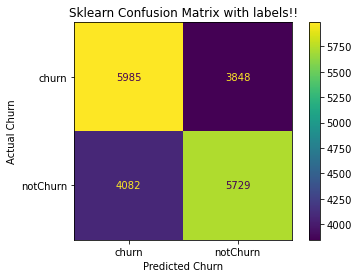

In [91]:
cm = confusion_matrix(y_test, y_pred)
#Create the Confusion Matrix Display Object(cmd_obj). 
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['churn', 'notChurn'])

#The plot() function has to be called for the sklearn visualization
cmd_obj.plot()

#Use the Axes attribute 'ax_' to get to the underlying Axes object.
#The Axes object controls the labels for the X and the Y axes. It also controls the title.
cmd_obj.ax_.set(
                title='Sklearn Confusion Matrix with labels!!', 
                xlabel='Predicted Churn', 
                ylabel='Actual Churn')
#Finally, call the matplotlib show() function to display the visualization of the Confusion Matrix.
plt.show()



In [92]:
from sklearn.metrics import roc_auc_score

In [93]:
roc_auc_score(y_test,y_pred)

0.5963005492095117

## Correlation matrix